# Titanic - Machine Learning project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading DataSet:-

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.shape

(891, 12)

# Top 5 Records

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for NaN Values (Missing Values):

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Insights of DataSet

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Filling NaNs

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

Hence to fill NaN values we used average of age, and for Cabin no. considered repeated Cabin no. of survived group

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

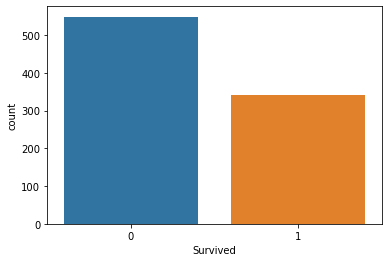

In [11]:
sns.countplot(x='Survived',data=data)
plt.show()

In [12]:
data.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [13]:
data.Name.nunique()

891

In [14]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
data.Sex.nunique()

2

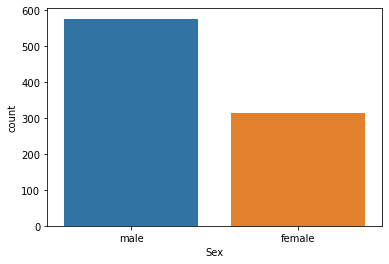

In [16]:
sns.countplot(x='Sex',data=data)
plt.show()

In [17]:
data.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [18]:
data.Ticket.nunique()

681

In [19]:
data.Cabin.value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [20]:
data.Cabin.nunique()

147

In [21]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
data.Embarked.nunique()

3

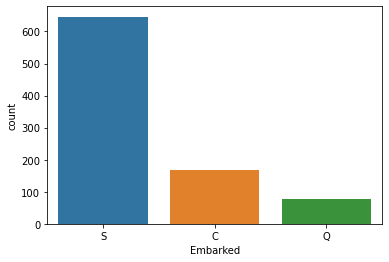

In [23]:
sns.countplot(x='Embarked',data=data)
plt.show()

Let's Delete Unique values 

In [24]:
data.Pclass.nunique()

3

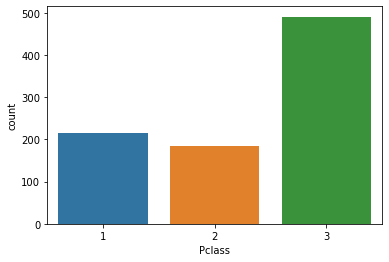

In [25]:
sns.countplot(x='Pclass',data=data)
plt.show()

In [26]:
data.SibSp.nunique()

7

In [27]:
data.Parch.nunique()

7

In order to get High accuracy the columns with high unique values need to delete i.e  and for remaining get dummies

In [28]:
data = pd.get_dummies(data, columns=["Sex"], drop_first=True)
data = pd.get_dummies(data, columns=["Embarked"],drop_first=True)
data = pd.get_dummies(data, columns=["Pclass"], drop_first=True)
data = pd.get_dummies(data, columns=["SibSp"],drop_first=True)
data = pd.get_dummies(data, columns=["Parch"],drop_first=True)

In [29]:
data

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,B96 B98,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,PC 17599,71.2833,C85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,B96 B98,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000,C123,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,B96 B98,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,211536,13.0000,B96 B98,1,0,1,...,0,0,0,0,0,0,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,112053,30.0000,B42,0,0,1,...,0,0,0,0,0,0,0,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,W./C. 6607,23.4500,B96 B98,0,0,1,...,0,0,0,0,0,1,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",26.000000,111369,30.0000,C148,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)

In [31]:
data

,PassengerId,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,22.000000,7.2500,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,38.000000,71.2833,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.000000,7.9250,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,35.000000,53.1000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,35.000000,8.0500,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,19.000000,30.0000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,889,0,29.699118,23.4500,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
889,890,1,26.000000,30.0000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To get high model accuracy unique data columns with lot of categories droped and remaining encoded 

# Model Building

In [34]:
data.drop_duplicates(inplace=True)

In [35]:
data.shape

(891, 21)

There is no duplicates in data

In [36]:
X=data.drop(columns=['Survived'],axis=1)
y=data['Survived']

# Split in to Train test dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=99)

# Model Confidence or Accuracy

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [41]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 99.84%

======TestResult========
Accuracy Score: 79.85%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       174
           1       0.71      0.71      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



It is showing that Train result is 100% and Test Result is 81% hence the model is over fitting so we need to do Hyperparameter tuning

# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
params ={'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10,15]} 

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params=>',grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 13}


In [45]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=13)

In [46]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)




=========TrainResult========
Accuracy Score: 93.74%

======TestResult========
Accuracy Score: 78.73%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       174
           1       0.70      0.68      0.69        94

    accuracy                           0.79       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.79      0.79      0.79       268



# Let's plot ROC AUC CURVES TO CHOOSE BEST MODEL

In [47]:
#Plotting AUC/ROC curve for multiple models without Hyper parametertuning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [48]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [49]:
X=data.drop(columns=['Survived'],axis=1)
y=data['Survived']

X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

lr.fit(X_train,Y_train)
rf.fit(X_train,Y_train)
kn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)

print("All models are trained")

All models are trained


In [50]:
lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)

print("All models test score captured")

All models test score captured


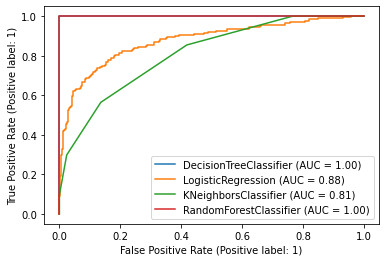

In [51]:
disp=plot_roc_curve(dt,X_train,Y_train)

plot_roc_curve(lr,X_train,Y_train,ax=disp.ax_)
plot_roc_curve(kn,X_train,Y_train,ax=disp.ax_)
plot_roc_curve(rf,X_train,Y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

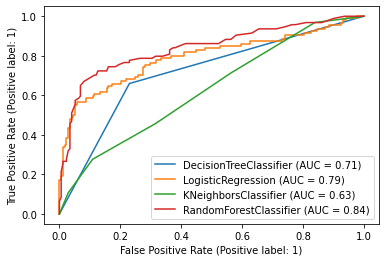

In [56]:
disp=plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

# BY Considering both Train & test data AUC ROC curve Random Forest is best model to find arbitary passenger survived from sinking

# Gradient Boosting trees model Building

In [57]:
from sklearn.feature_selection import SelectPercentile,chi2

In [60]:
Spercentile=SelectPercentile(score_func=chi2,percentile=80)
Spercentile=Spercentile.fit(X,y)

In [62]:
cols=Spercentile.get_support(indices=True)
print('Feature Index=',cols)


Feature Index= [ 0  1  2  3  5  6  7  8 10 11 12 13 14 15 16 17]


In [63]:
features=X.columns[cols]
print('Features=',list(features))

Features= ['PassengerId', 'Age', 'Fare', 'Sex_male', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'SibSp_1', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4']


In [69]:
data_score=pd.DataFrame({'features':X.columns,
                 'chi2score':Spercentile.scores_,
                 'pvalue':Spercentile.pvalues_})
data_score.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
2,Fare,4518.319091,0.000000e+00
3,Sex_male,92.702447,6.077838e-22
7,Pclass_3,41.553071,1.147141e-10
1,Age,24.687926,6.740514e-07
8,SibSp_1,20.429499,6.186875e-06
14,Parch_1,13.916150,1.911490e-04
6,Pclass_2,6.160767,1.306146e-02
5,Embarked_S,5.489205,1.913424e-02
15,Parch_2,4.564280,3.264540e-02
13,SibSp_8,4.360656,3.677815e-02


# Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X_scaler=scaler.fit_transform(X)

In [75]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.3,random_state=22)

In [87]:
def metric_score(clf,X_train,x_test,Y_train,y_test,train=True):
    
    if train:
        y_pred=clf.predict(X_train)
        print("\n==========TrainResult===========")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        
        pred=clf.predict(x_test)
        print("\n==========TestResult=============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [88]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [89]:
metric_score(gbdt_clf,X_train,x_test,Y_train,y_test,train=True)
metric_score(gbdt_clf,X_train,x_test,Y_train,y_test,train=False)


==========TrainResult===========
Accuracy score:53.29%

==========TestResult=============
Accuracy Score:77.99%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       164
           1       0.74      0.67      0.70       104

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



# Let's Improve model performance with Hyper parameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid_param = {'learning_rate':np.arange(0.1,0.3)}

In [95]:
grid = GridSearchCV(GradientBoostingClassifier(),
                   param_grid=grid_param)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1])})

In [96]:
grid.best_params_

{'learning_rate': 0.1}

In [97]:
gbdt_clf = GradientBoostingClassifier(max_depth=8,min_samples_split=2,learning_rate=0.1)
gbdt_clf.fit(X_train,Y_train)

GradientBoostingClassifier(max_depth=8)

In [98]:
metric_score(gbdt_clf,X_train,x_test,Y_train,y_test,train=True)
metric_score(gbdt_clf,X_train,x_test,Y_train,y_test,train=False)


==========TrainResult===========
Accuracy score:51.52%

==========TestResult=============
Accuracy Score:82.46%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       164
           1       0.81      0.71      0.76       104

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

